# Baseline analysis of wikipedia discussions in spanish

In this analysis, we are going to automatically identify the role of the author in the discussions or talk pages of collaborative writing documents such as wikipedia in spanish language.

In [2]:
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load our labelled dataset, containing the opinions in the talk pages of wikipedia segmented by sentences contributed by each author.

In [3]:
ds = pd.read_csv('data/wdds.csv')
ds['creation_dt'] = pd.to_datetime(ds['timestamp'], unit='s')
ds.info()

In [6]:
ds.groupby('page_title').size()

page_title
Discusión:Daniel Ortega             100
Discusión:Donald Trump              100
Discusión:Enrique Peña Nieto        100
Discusión:Evo Morales               100
Discusión:Horacio Cartes              6
Discusión:Juan Orlando Hernández    100
Discusión:Mauricio Macri            100
Discusión:Michelle Bachelet         100
Discusión:Nicolás Maduro            100
Discusión:Pedro Pablo Kuczynski     100
Discusión:Rafael Correa             100
Discusión:Raúl Castro                97
Discusión:Tabaré Vázquez            100
dtype: int64

In [7]:
print(f'total number of opinions: {len(ds)}')
print(f'unique authors: {ds.contributor.nunique()}')

total number of opinions: 1203
unique authors: 177


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


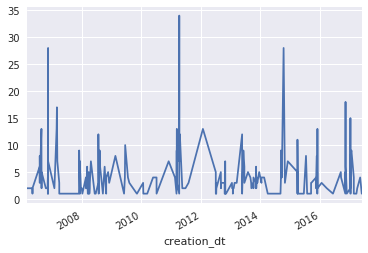

In [9]:
ts = ds.groupby(['creation_dt']).size()
ts.plot()